# Visualizing Grades Analysis
#### Teo Zeng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grades = pd.read_csv("grades.csv")
grades.columns

Index(['Quarter', 'Course_Level', 'Course', 'Instructor', 'Grade_Given',
       'Sum_of_Student_Count'],
      dtype='object')

Finding unique values in a column

In [3]:
instructor_list = grades["Instructor"].unique()
quarter_list = grades["Quarter"].unique()
course_level_list = grades["Course_Level"].unique()
course_list = grades["Course"].unique()

### Which professor likes giving A's? We consider A,A-,A+ are all A's.

In [5]:
rate = {}
for instructor in instructor_list:
    df = grades.loc[grades['Instructor'] == instructor]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        rate[instructor] = 0
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    rate[instructor] = number_of_A_students / total_students
sorted_rate = dict(sorted(rate.items(), key=lambda x: x[1], reverse=True))

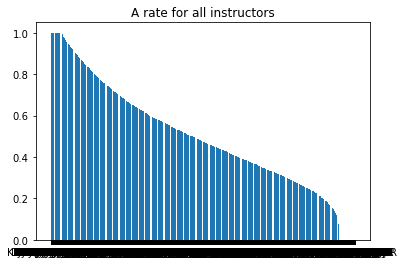

In [6]:
plt.bar(range(len(sorted_rate)), list(sorted_rate.values()), align='center')
plt.xticks(range(len(sorted_rate)), list(sorted_rate.keys()))
plt.title("A rate for all instructors")
plt.show()

In [35]:
popular_instructor_rate = {}
for instructor in instructor_list:
    df = grades.loc[grades['Instructor'] == instructor]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students <5000:
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    popular_instructor_rate[instructor] = number_of_A_students / total_students
sorted_popular_instructor_rate = dict(sorted(popular_instructor_rate.items(), key=lambda x: x[1], reverse=True))

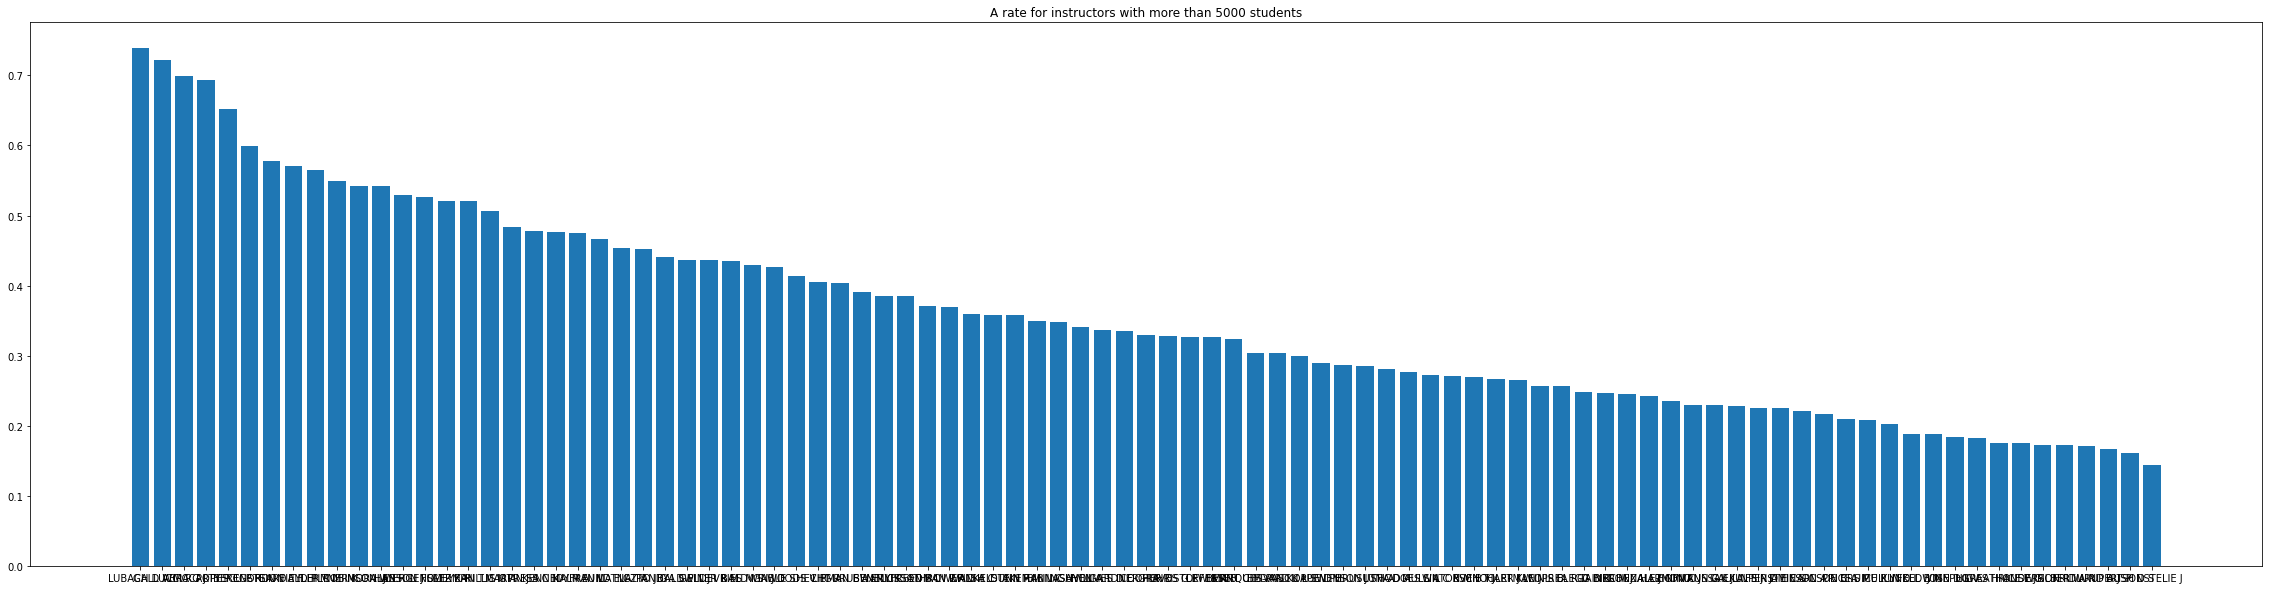

In [36]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_popular_instructor_rate)), list(sorted_popular_instructor_rate.values()), align='center')
plt.xticks(range(len(sorted_popular_instructor_rate)), list(sorted_popular_instructor_rate.keys()))
plt.title("A rate for instructors with more than 5000 students")
plt.show()

In [37]:
sorted_popular_instructor_rate

{'LUBACH D W': 0.7390631049167634,
 'GALLUCCI R': 0.7224686351539729,
 'ABRA G J': 0.6994577846630519,
 'MCCARTY P C': 0.6935483870967742,
 'POPESCU P F': 0.6519462384360273,
 'BERENSTEIN D': 0.5990920040767164,
 'GORDON A F': 0.5774783445620789,
 'GARFIELD P M': 0.5702372393961179,
 'TYLER C M': 0.5652014652014652,
 'HILTNER K C': 0.5489379001931091,
 'ROBINSON W I': 0.5428822495606327,
 'MORALES H L': 0.5427335016227912,
 'HANSON J L': 0.5299777942264989,
 'JUERGENSMEYER': 0.5259834871296746,
 'FOLTZ K R': 0.5202544358888517,
 'GERMAN T C M': 0.5202312138728323,
 'HILLIS G A': 0.5069637883008357,
 'MARTIN J A': 0.4842589842589843,
 'PRESS C M': 0.4785293613128252,
 'KENNEDY R A': 0.4766418415707515,
 'KALMAN L': 0.47453864298598586,
 'FREUND E G': 0.466396096052568,
 'MATNI Z A': 0.45368171021377673,
 'LATTO J G': 0.4516902223324242,
 'PANDYA S P': 0.4403242955874535,
 'BALDWIN J I': 0.4365305185865076,
 'GELLER R M': 0.43585428627994455,
 'DEVRIES M S': 0.4357720519089712,
 'BALDWIN

### Which professor likes giving F's? We consider C-, D+,D,D-,F are "fails".

In [38]:
popular_instructor_rate_fail = {}
for instructor in instructor_list:
    df = grades.loc[grades['Instructor'] == instructor]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students <5000:
        continue
    df_A = df.loc[(df['Grade_Given'] == "D") | (df['Grade_Given'] == "C-") | (df['Grade_Given'] == "D+")| (df['Grade_Given'] == "D")| (df['Grade_Given'] == "D-")| (df['Grade_Given'] == "F")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    popular_instructor_rate_fail[instructor] = number_of_A_students / total_students
sorted_popular_instructor_rate_fail = dict(sorted(popular_instructor_rate_fail.items(), key=lambda x: x[1], reverse=True))

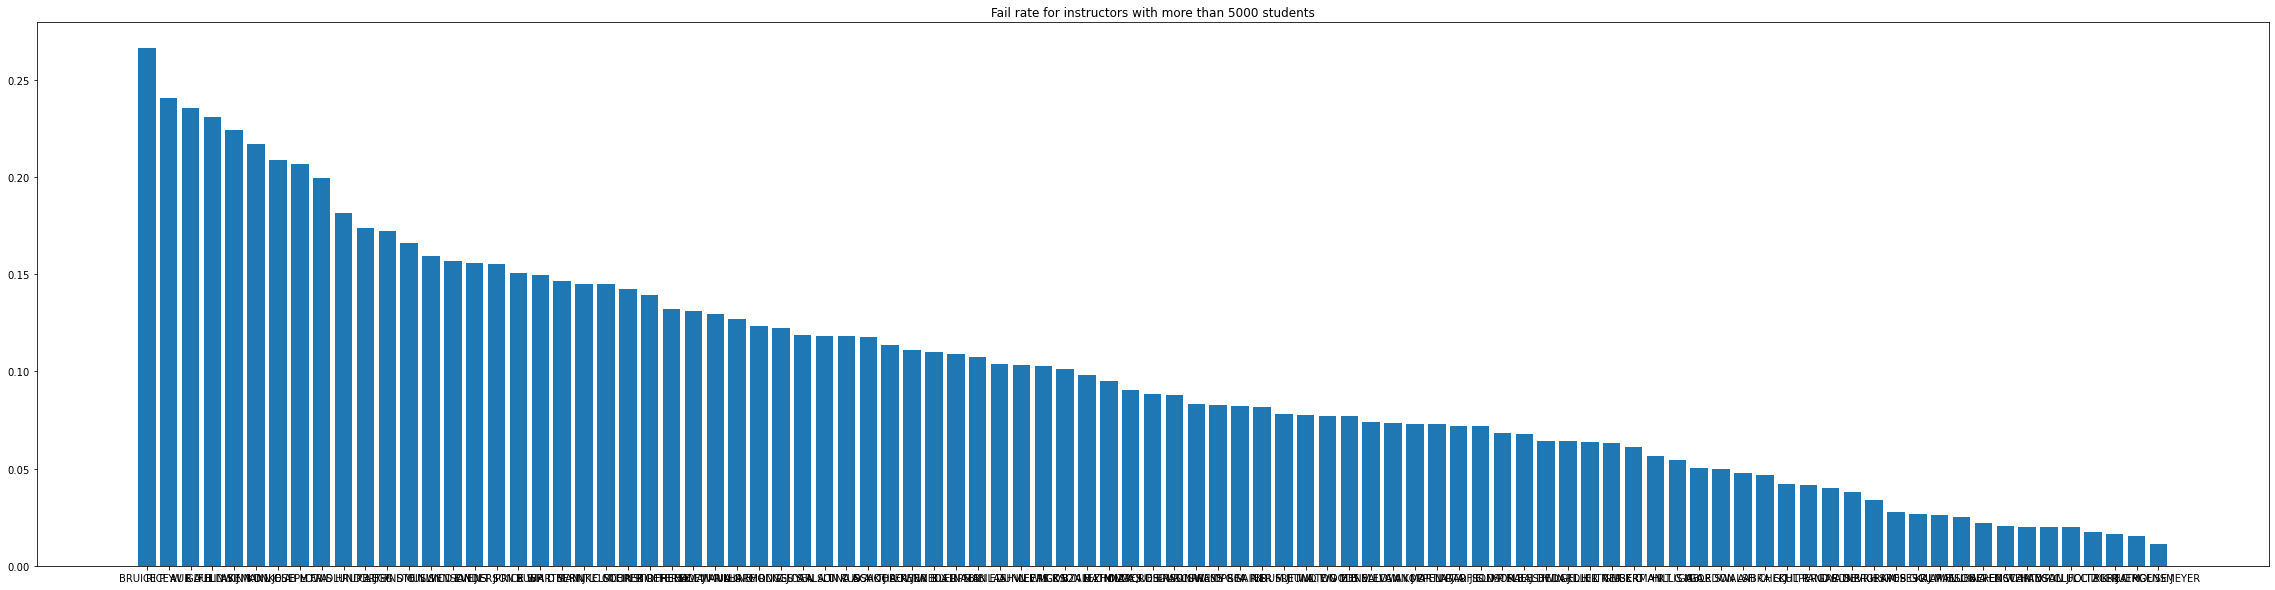

In [40]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_popular_instructor_rate_fail)), list(sorted_popular_instructor_rate_fail.values()), align='center')
plt.xticks(range(len(sorted_popular_instructor_rate_fail)), list(sorted_popular_instructor_rate_fail.keys()))
plt.title("Fail rate for instructors with more than 5000 students")
plt.show()

In [41]:
sorted_popular_instructor_rate_fail

{'BRUICE P Y': 0.26617620989186314,
 'RICE W R': 0.24026916479746668,
 'AUE D H': 0.23557075673364686,
 'GAULIN S J': 0.23052721899132425,
 'FELDWINN D L': 0.22416902860087606,
 'AKEMANN C A': 0.21696315120711562,
 'KUNKEL B M': 0.20886806056236482,
 'JOSEPH C A': 0.20647102161100198,
 'LOW S H': 0.19937446988973706,
 'FRIDLUND A J': 0.18147213738768644,
 'RUPERT P': 0.17364953886693016,
 'CLEGG D O': 0.1723684210526316,
 'FEINSTEIN S C': 0.1660671022685559,
 'MULLIN D I': 0.15906757034298624,
 'SWENSON J S': 0.1564665127020785,
 'EVEN T J': 0.1556347660297592,
 'ANDERSON R W': 0.15499101873235824,
 'PRICE S P': 0.15049261083743842,
 'BUSH D S': 0.14927703482451973,
 'HARTMAN J L': 0.1466044415835211,
 'BERNT C M': 0.14505813953488372,
 'FINKELSTEIN R': 0.1447912749153817,
 'COOPER D': 0.14239237345842476,
 'CHRISTOFFERSE': 0.13947917946198254,
 'BIRCHENALL J': 0.13190773666506486,
 'FREEDMAN R A': 0.13108108108108107,
 'HOFMANN G E': 0.1294982587385528,
 'MULLIN C R': 0.12666541565021

### Which majors are harder to get A's?

A list of departments

In [8]:
dept_list = np.unique([course[0:5] for course in course_list])
dept_list

array(['ANTH ', 'ART  ', 'ARTHI', 'ARTST', 'AS AM', 'ASTRO', 'BIOL ',
       'BL ST', 'BMSE ', 'C LIT', 'CH E ', 'CH ST', 'CHEM ', 'CHIN ',
       'CLASS', 'CMPSC', 'CMPTG', 'CNCSP', 'COMM ', 'DANCE', 'DYNS ',
       'EACS ', 'EARTH', 'ECE  ', 'ECON ', 'ED   ', 'EDS  ', 'EEMB ',
       'ENGL ', 'ENGR ', 'ENV S', 'ES   ', 'ESM  ', 'ESS  ', 'FAMST',
       'FEMST', 'FLMST', 'FR   ', 'GEOG ', 'GEOL ', 'GER  ', 'GLOBL',
       'GPS  ', 'GRAD ', 'GREEK', 'HEB  ', 'HIST ', 'INT  ', 'ITAL ',
       'JAPAN', 'KOR  ', 'LAIS ', 'LATIN', 'LAWSO', 'LING ', 'LIT  ',
       'MARSC', 'MAT  ', 'MATH ', 'MATRL', 'MCDB ', 'ME   ', 'ME ST',
       'MES  ', 'MS   ', 'MUS  ', 'MUS A', 'PHIL ', 'PHYS ', 'POL S',
       'PORT ', 'PSTAT', 'PSY  ', 'RG ST', 'RUSS ', 'SHS  ', 'SLAV ',
       'SOC  ', 'SPAN ', 'THTR ', 'TMP  ', 'W&L  ', 'WRIT '], dtype='<U5')

In [11]:
dept_rate = {}
for d in dept_list:
    df = grades[grades['Course'].str.startswith(d)]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    dept_rate[d] = number_of_A_students / total_students
sorted_dept_rate = dict(sorted(dept_rate.items(), key=lambda x: x[1], reverse=True))

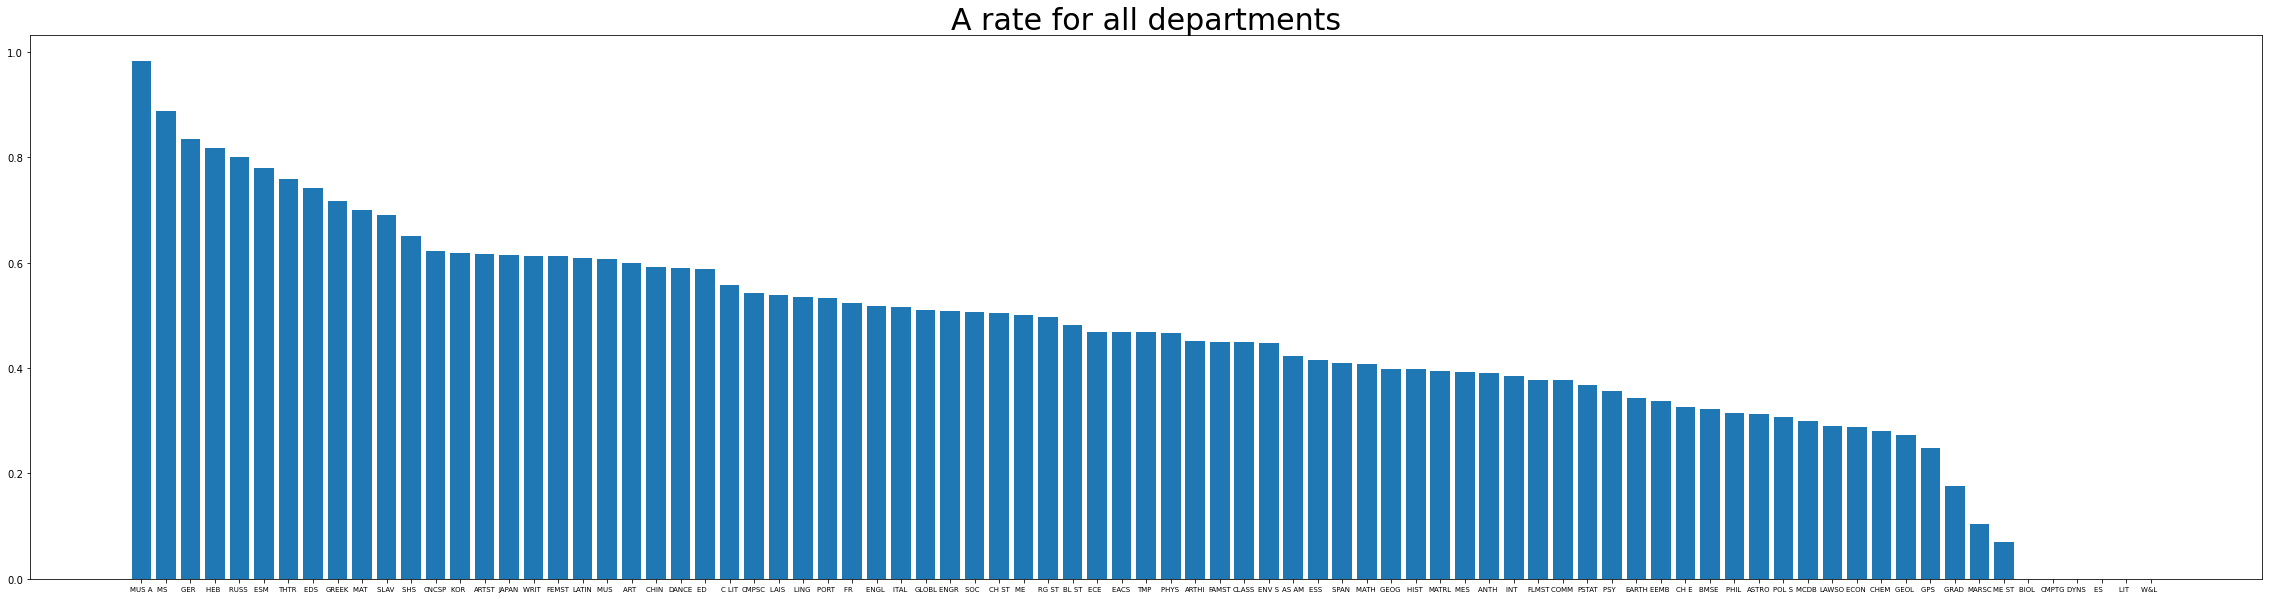

In [25]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_dept_rate)), list(sorted_dept_rate.values()), align='center')
plt.xticks(range(len(sorted_dept_rate)), list(sorted_dept_rate.keys()))
plt.title("A rate for all departments", fontsize=30)
plt.xticks(fontsize=7)
plt.show()

### Failing Rate for All Departments

In [26]:
dept_rate_fail = {}
for d in dept_list:
    df = grades[grades['Course'].str.startswith(d)]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        continue
    df_A = df.loc[(df['Grade_Given'] == "D") | (df['Grade_Given'] == "C-") | (df['Grade_Given'] == "D+")| (df['Grade_Given'] == "D")| (df['Grade_Given'] == "D-")| (df['Grade_Given'] == "F")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    dept_rate_fail[d] = number_of_A_students / total_students
sorted_dept_rate_fail = dict(sorted(dept_rate_fail.items(), key=lambda x: x[1], reverse=True))

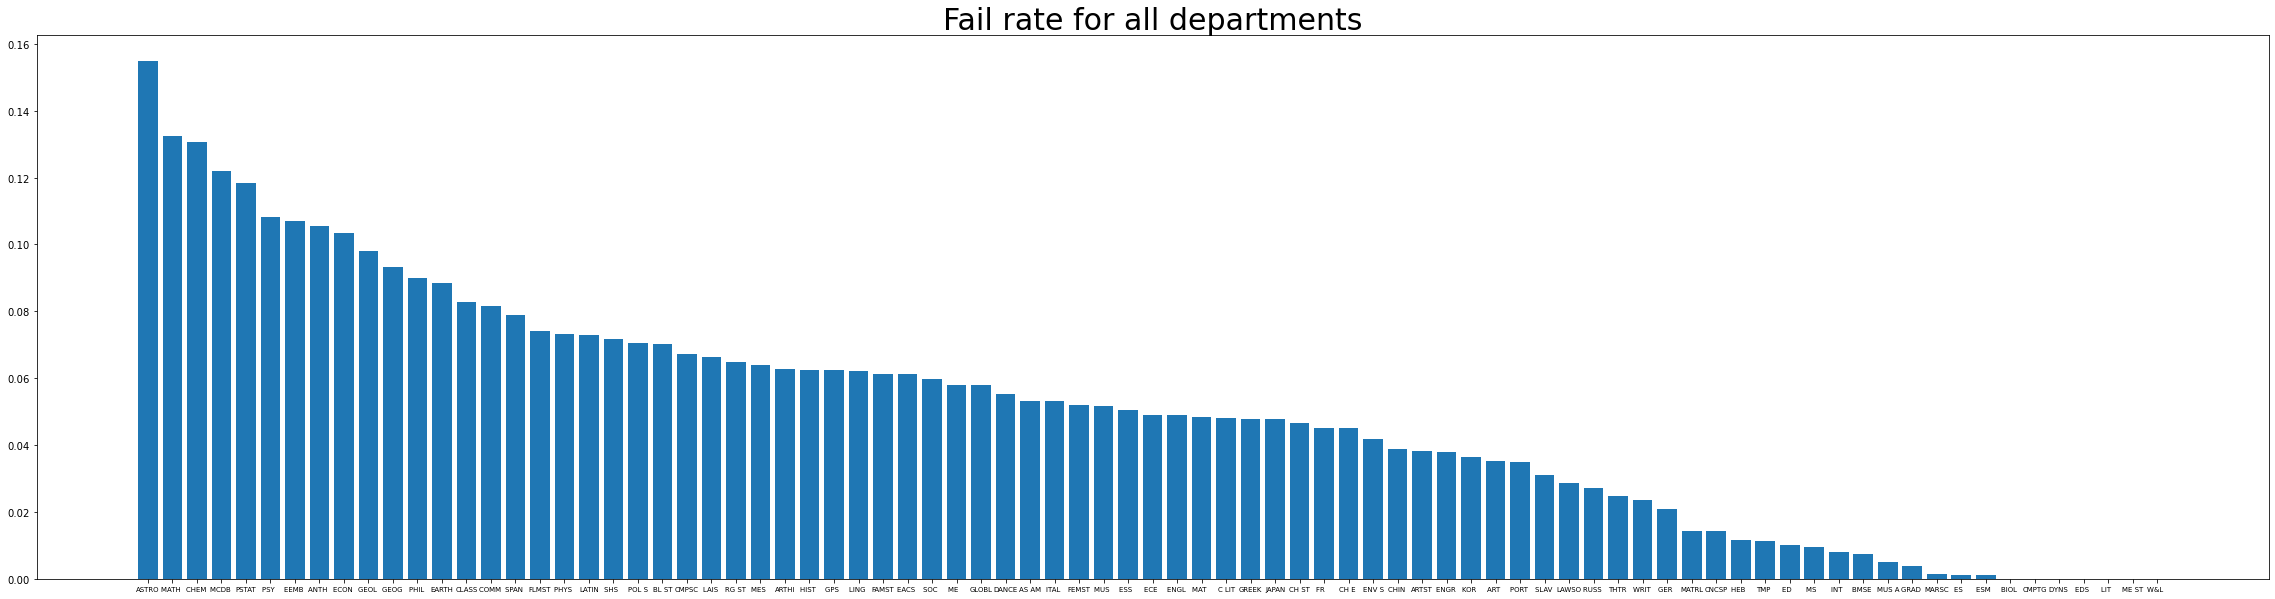

In [28]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_dept_rate_fail)), list(sorted_dept_rate_fail.values()), align='center')
plt.xticks(range(len(sorted_dept_rate_fail)), list(sorted_dept_rate_fail.keys()))
plt.title("Fail rate for all departments", fontsize=30)
plt.xticks(fontsize=7)
plt.show()

### What are the hardest courses and easiest courses at UCSB?

In [50]:
course_rate = {}
for course in course_list:
    df = grades.loc[grades['Course'] == course]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students < 5000:
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    course_rate[course] = number_of_A_students / total_students
sorted_course_rate = dict(sorted(course_rate.items(), key=lambda x: x[1], reverse=True))

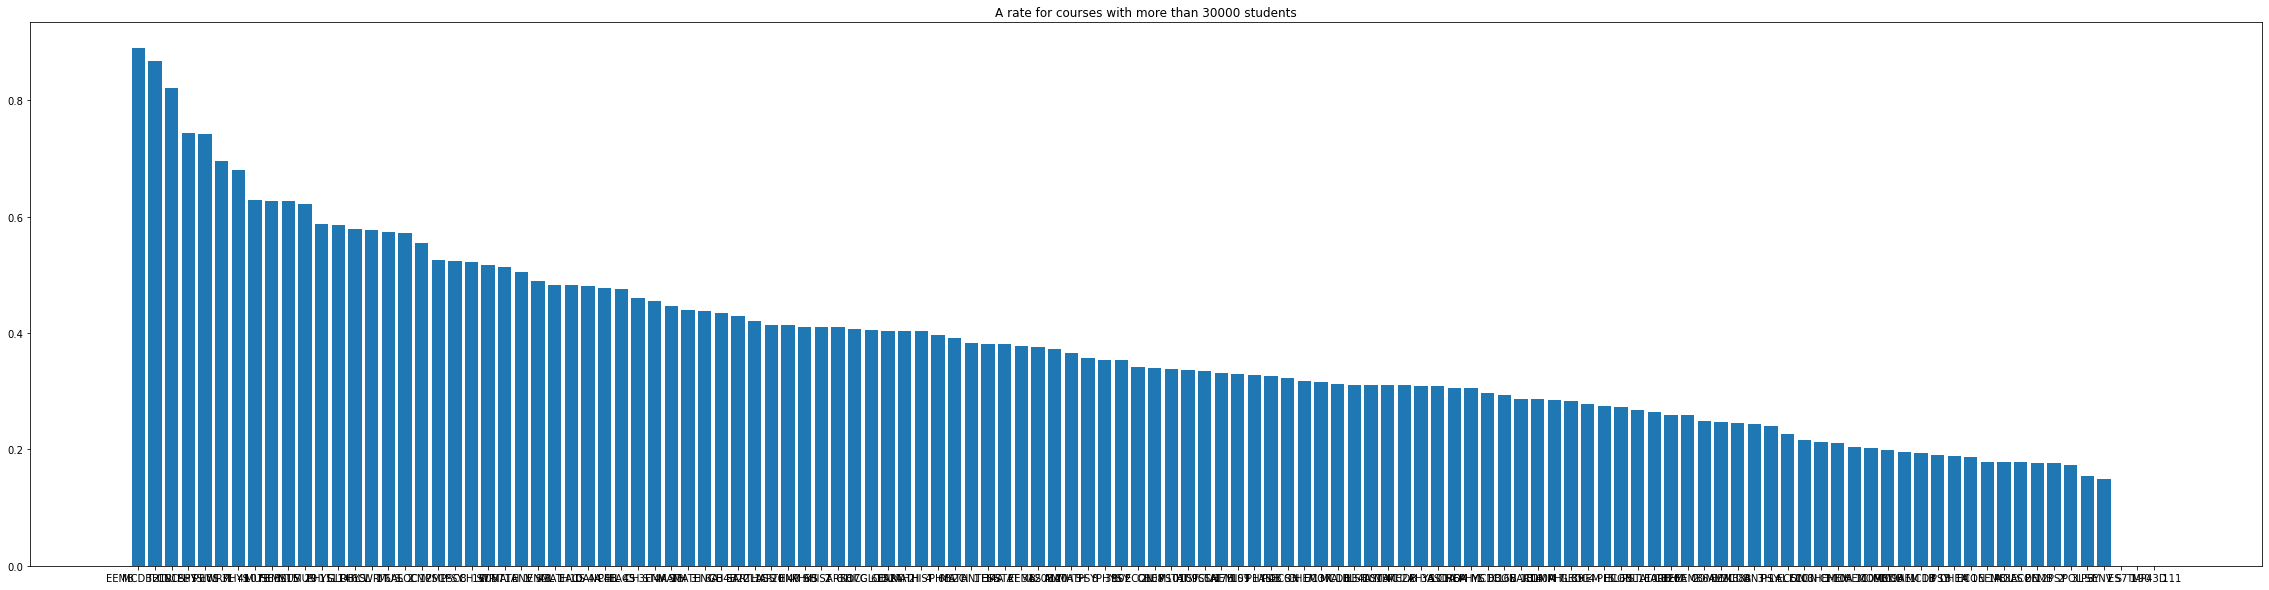

In [51]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_course_rate)), list(sorted_course_rate.values()), align='center')
plt.xticks(range(len(sorted_course_rate)), list(sorted_course_rate.keys()))
plt.title("A rate for courses with more than 30000 students")
plt.show()

In [52]:
sorted_course_rate

{'EEMB      2LL': 0.8896177980604678,
 'MCDB      1LL': 0.8676239893809581,
 'THTR      5': 0.8203524729960204,
 'CNCSP   101': 0.7432912391475928,
 'PHYS      3L': 0.7422914638104512,
 'PHYS      4L': 0.6962616822429907,
 'WRIT    107B': 0.6793073593073593,
 'PHYS      6BL': 0.6291397217323144,
 'MUS      15': 0.627315439866069,
 'FEMST    20': 0.6271247092503132,
 'MUS      11': 0.6221465076660988,
 'MUS     114': 0.5875184638109305,
 'PHYS      6CL': 0.5853407676067774,
 'GLOBL     1': 0.5789820923656928,
 'PHYS      6AL': 0.5766782911944203,
 'WRIT      2': 0.5737835153922543,
 'MUS      17': 0.5720140515222483,
 'SOC       1': 0.5545512288073484,
 'CMPSC     8': 0.5255483870967742,
 'CMPSC    16': 0.5244304791830322,
 'PSY     105': 0.5213950762016413,
 'CH ST     1A': 0.5176138251910933,
 'WRIT      1': 0.5133483862398724,
 'MATH      4B': 0.5048558084365038,
 'ENV S     1': 0.48892238131122834,
 'ENGL     10': 0.4831136341768498,
 'MATH      4A': 0.48178116517018166,
 'EACS     

In [53]:
course_rate_fail = {}
for course in course_list:
    df = grades.loc[grades['Course'] == course]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students < 5000:
        continue
    df_A = df.loc[(df['Grade_Given'] == "D") | (df['Grade_Given'] == "C-") | (df['Grade_Given'] == "D+")| (df['Grade_Given'] == "D")| (df['Grade_Given'] == "D-")| (df['Grade_Given'] == "F")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    course_rate_fail[course] = number_of_A_students / total_students
sorted_course_rate_fail = dict(sorted(course_rate_fail.items(), key=lambda x: x[1], reverse=True))

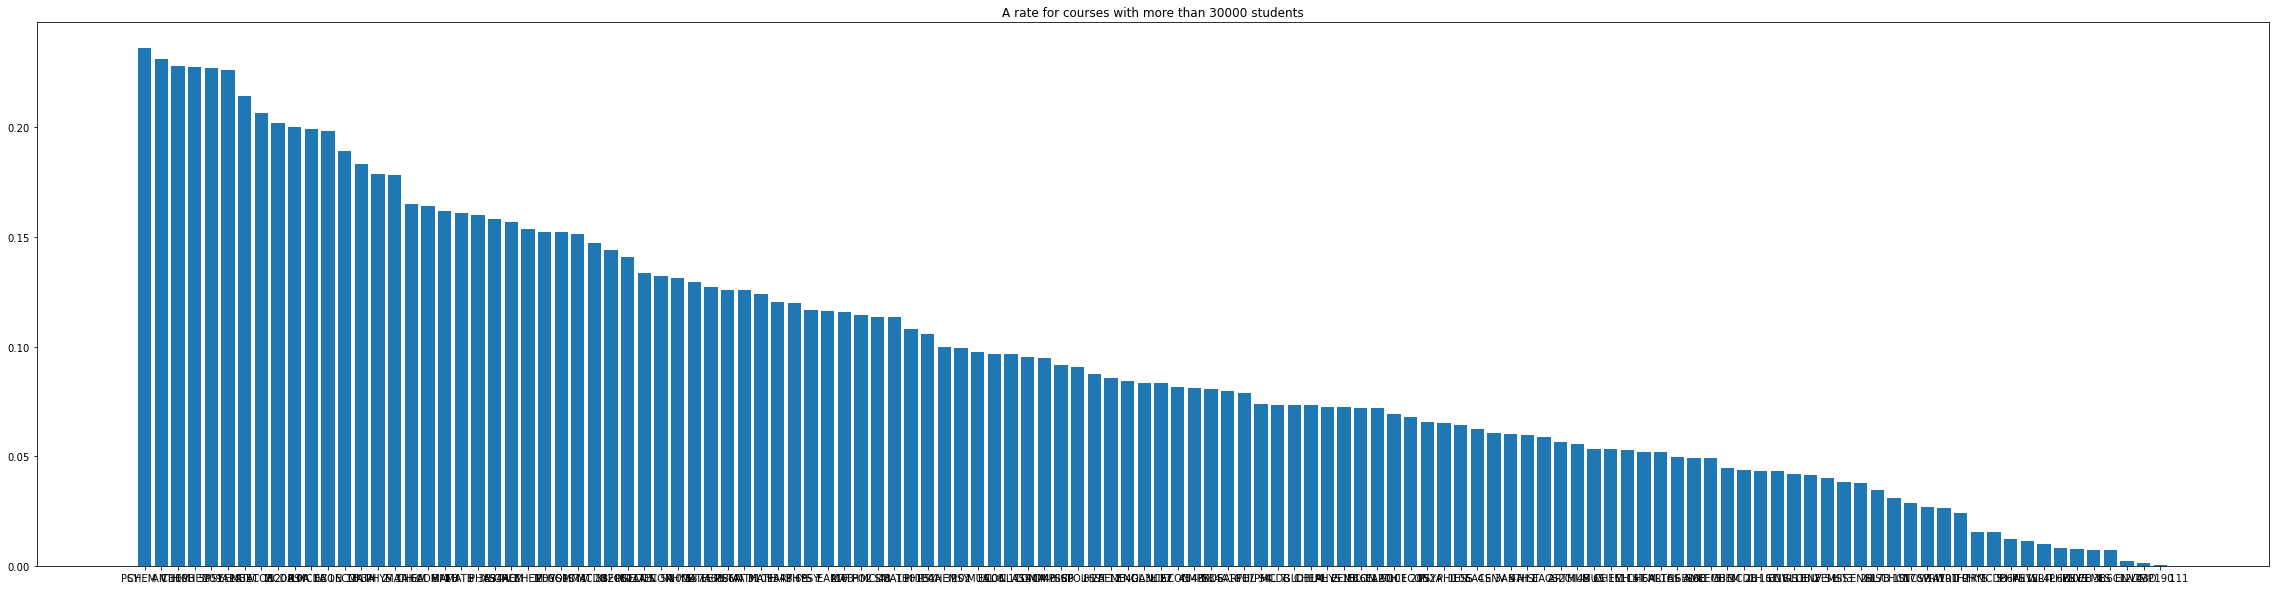

In [54]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_course_rate_fail)), list(sorted_course_rate_fail.values()), align='center')
plt.xticks(range(len(sorted_course_rate_fail)), list(sorted_course_rate_fail.keys()))
plt.title("A rate for courses with more than 30000 students")
plt.show()

In [55]:
sorted_course_rate_fail

{'PSY       7': 0.23614234687127927,
 'CHEM    109B': 0.23128372729345595,
 'ANTH      5': 0.2279559118236473,
 'CHEM    109A': 0.22740952800411068,
 'CHEM      1A': 0.22709860344463548,
 'PSY       3': 0.22634049913516185,
 'EEMB      2': 0.21435023145534604,
 'PSTAT   120A': 0.20669926141683137,
 'ECON     10A': 0.20217226919639789,
 'MCDB      1A': 0.20024603898445287,
 'PSY       1': 0.19905962634710606,
 'MCDB      1B': 0.19851000567935054,
 'ECON      3A': 0.1893342877594846,
 'ECON      2': 0.18325207915113279,
 'MATH      3A': 0.1788317620760035,
 'PHYS      6A': 0.17843042183279076,
 'MATH      8': 0.16496668026655786,
 'CHEM      1B': 0.16393121548043402,
 'COMM      1': 0.1618974751338944,
 'MATH      3B': 0.16106252376554947,
 'MATH     34A': 0.16008622049313917,
 'PHYS      3': 0.15828402366863906,
 'ASTRO     1': 0.1570203644158628,
 'CHEM    109C': 0.15373815373815375,
 'CHEM      1C': 0.1522710799710075,
 'PHYS      1': 0.15210233029381964,
 'COMM     88': 0.15123945147

### Is there GPA inflation in UCSB?

In [56]:
quarter_rate = {}
for quarter in quarter_list:
    df = grades.loc[grades['Quarter'] == quarter]
    total_students = sum(df["Sum_of_Student_Count"])
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    quarter_rate[quarter] = number_of_A_students / total_students
sorted_quarter_rate = dict(sorted(quarter_rate.items(), key=lambda x: x[1], reverse=True))

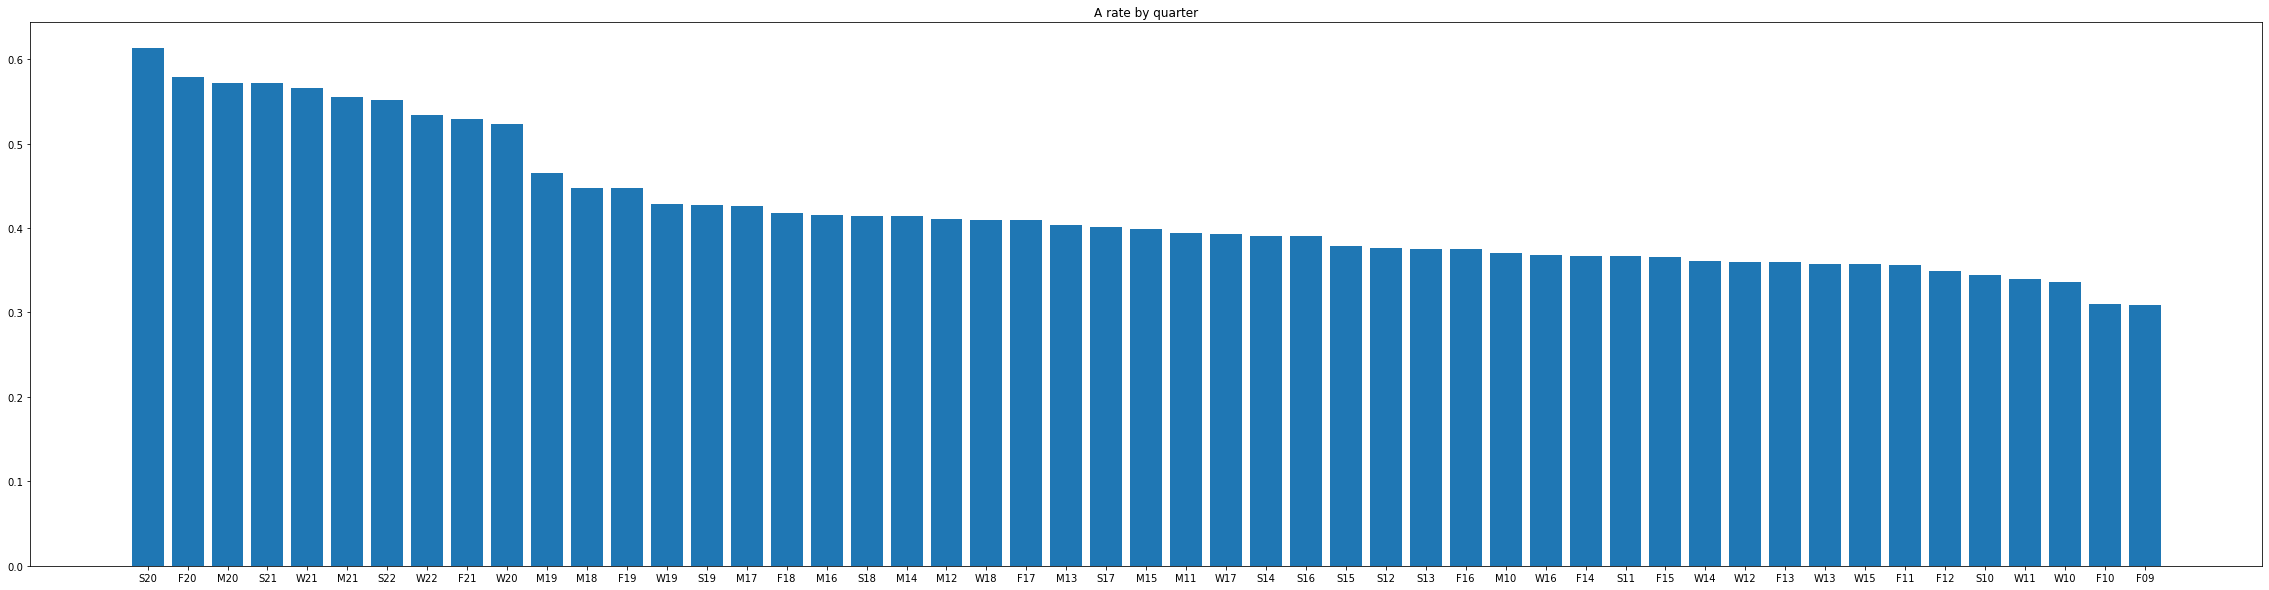

In [58]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_quarter_rate)), list(sorted_quarter_rate.values()), align='center')
plt.xticks(range(len(sorted_quarter_rate)), list(sorted_quarter_rate.keys()))
plt.title("A rate by quarter")
plt.show()

### Fail Rate by Quarter

In [59]:
quarter_rate_fail = {}
for quarter in quarter_list:
    df = grades.loc[grades['Quarter'] == quarter]
    total_students = sum(df["Sum_of_Student_Count"])
    df_A = df.loc[(df['Grade_Given'] == "D") | (df['Grade_Given'] == "C-") | (df['Grade_Given'] == "D+")| (df['Grade_Given'] == "D")| (df['Grade_Given'] == "D-")| (df['Grade_Given'] == "F")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    quarter_rate_fail[quarter] = number_of_A_students / total_students
sorted_quarter_rate_fail = dict(sorted(quarter_rate_fail.items(), key=lambda x: x[1], reverse=True))

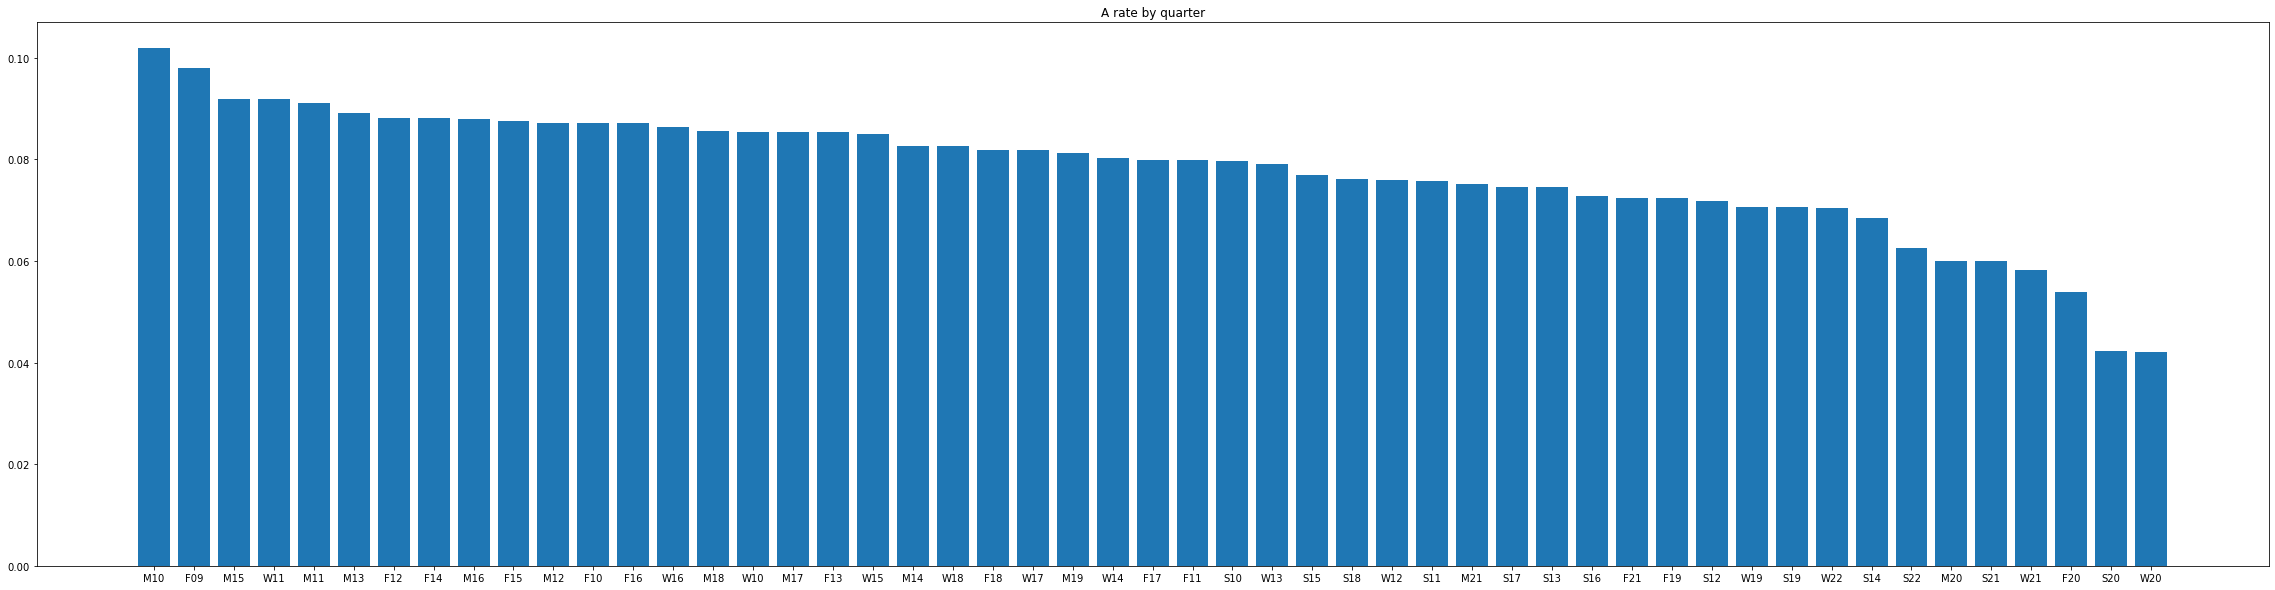

In [60]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_quarter_rate_fail)), list(sorted_quarter_rate_fail.values()), align='center')
plt.xticks(range(len(sorted_quarter_rate_fail)), list(sorted_quarter_rate_fail.keys()))
plt.title("A rate by quarter")
plt.show()